In [71]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Karate club dataset

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


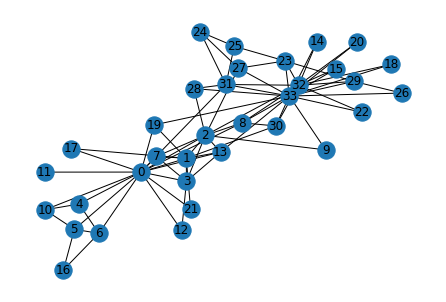

In [72]:
dataset = nx.karate_club_graph()
order = sorted(list(dataset.nodes()))
print(order)
nx.draw(dataset, with_labels=True)

# Adjacency Matrix

In [73]:
A = nx.to_numpy_matrix(dataset, nodelist=order)
print(A.shape)
print(A)

(34, 34)
[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


In [74]:
# update all value in adjacency matrix that is greater than 0 to 1
A[A > 0] = 1
print(A)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


# Add Self loop

In [75]:
num_nodes = A.shape[0] #34
I = np.matrix(np.eye(num_nodes))
A_hat = A + I
print(A_hat)

[[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


# Degree Matrix

In [76]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

print(D_hat)

[[17.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 18.]]


# Weigh initialization randomly

In [77]:
W_1 = np.random.normal(
    loc= 0, scale= 1, size=(num_nodes, 16))
W_2 = np.random.normal(
    loc= 0, scale= 1, size=(W_1.shape[1], 2))

print(W_1)

[[ 2.69768797e-02 -1.15132957e+00  3.24618664e-01  9.30664915e-01
  -1.46506486e-01 -1.08355013e+00 -9.64926897e-01 -3.18880806e-01
  -9.94364494e-01 -1.15241323e+00 -3.46617777e-01 -5.83477802e-01
   5.74092838e-02  8.93991188e-01 -2.34393339e+00 -3.17460289e+00]
 [ 8.98756411e-01  1.39679439e-01  6.53053158e-01  2.71272068e-01
   1.29369060e+00 -1.43342886e+00  7.74206093e-01  6.91778961e-01
   4.30923488e-01 -5.36838576e-01 -6.74619909e-01  9.73603566e-02
   8.09995565e-01  1.11748520e+00  1.01731364e+00 -7.75958226e-01]
 [-2.63887032e+00  1.51995336e-01 -5.69422771e-01  8.15089707e-01
  -9.53305038e-01  1.44894833e-01  8.75608341e-02  5.04780494e-01
   9.89042545e-01 -2.45587732e+00 -4.21884324e-01  1.60600110e-01
  -9.52207240e-01  1.46114420e+00  2.79486885e-01  1.09939830e-01]
 [ 6.11072230e-01 -1.06993648e+00  1.53817357e+00 -1.09617085e+00
   1.62578198e-01 -9.86899551e-01  5.58842850e-01  1.17227572e+00
   2.33543817e+00  3.58820724e-01 -8.37893995e-01 -9.94793015e-01
   3.19

# Relu function

In [78]:
def relu(x):
   return np.maximum(0,x)

# Combine into a single GCN layer

In [79]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

# Stacking GNC layers into a model
Input: matrix of node features (each node is a row)
No features -> one-hot-encoding of node ids

In [80]:
def gcn_model(input_matrix, a_hat, d_hat, w_1, w_2):
    h_1 = gcn_layer(a_hat, d_hat, input_matrix, w_1)
    print(h_1.shape)
    h_2 = gcn_layer(a_hat, d_hat, h_1, w_2)
    print(h_2.shape)
    return h_2

H_0 = np.matrix(np.eye(num_nodes))
print(H_0.shape)
H_2 = gcn_model(H_0, A_hat, D_hat, W_1, W_2)
print(H_2)

(34, 34)
(34, 16)
(34, 2)
[[1.08559554 0.9508265 ]
 [1.11426852 1.06519002]
 [1.39532541 1.14851958]
 [1.38780136 1.09588365]
 [0.73884602 0.47221628]
 [1.57867862 0.40462302]
 [1.55146416 0.42023378]
 [1.49426316 1.10781204]
 [1.28182522 0.79630294]
 [1.41849488 0.8212112 ]
 [0.81843867 0.95907395]
 [1.1505927  0.27309309]
 [1.10911296 0.57194966]
 [1.1572536  0.87426637]
 [0.87702488 0.08964233]
 [2.28680615 0.47448509]
 [2.26159462 0.32316775]
 [0.51326012 0.75948572]
 [2.50759922 0.78982994]
 [0.39890625 0.31758631]
 [1.03593289 0.11796026]
 [0.18237055 0.09268546]
 [1.32567019 0.06710196]
 [1.30855563 0.71705061]
 [1.39025299 0.88760627]
 [1.5134086  1.13106267]
 [1.50514941 1.08404518]
 [1.57567591 1.02558617]
 [1.24236724 0.7094973 ]
 [1.47998007 1.04077815]
 [1.10490348 0.91910137]
 [1.10993982 0.53114563]
 [2.11259207 1.01630227]
 [1.81693672 1.08306305]]
